In [16]:
import pandas as pd

# DATA CLEANING AND PRE-PROCESSING

# Load dataset 
df = pd.read_csv("C:/Users/nora_/Downloads/market_comments.csv")

print(df.columns)





Index(['item_category', 'item_id', 'brand', 'user_id', 'date', 'comment',
       'rating', 'tonality'],
      dtype='object')


In [17]:
# Count missing values in each column
missing_values = df.isnull().sum()

# Show only columns that have missing values
print("Missing values in dataset:")
print(missing_values[missing_values > 0])


Missing values in dataset:
Series([], dtype: int64)


In [18]:
#check the type of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14281 entries, 0 to 14280
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   item_category  14281 non-null  int64  
 1   item_id        14281 non-null  int64  
 2   brand          14281 non-null  int64  
 3   user_id        14281 non-null  int64  
 4   date           14281 non-null  object 
 5   comment        14281 non-null  object 
 6   rating         14281 non-null  float64
 7   tonality       14281 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 892.7+ KB


In [19]:
# Convert 'date' column to datetime format
df["date"] = pd.to_datetime(df["date"])

# Convert 'rating' column to integers
df["rating"] = df["rating"].astype(int)


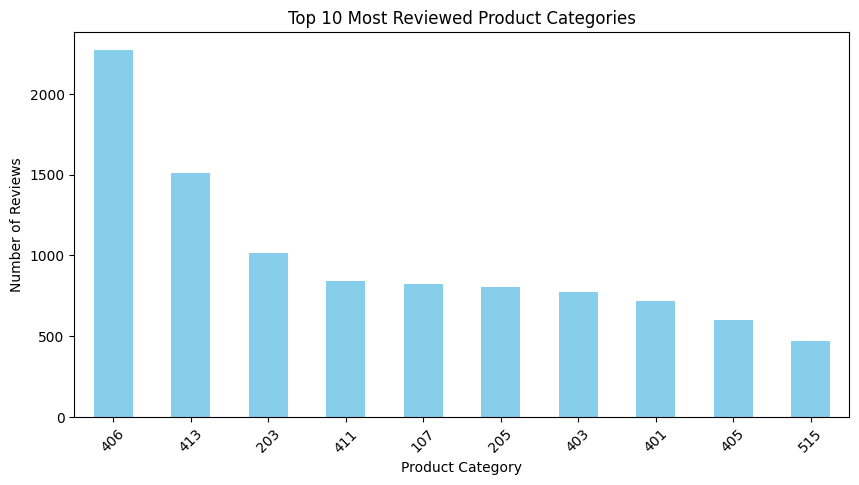

In [20]:
# EXPLORATORY DATA ANALYSIS

import matplotlib.pyplot as plt

# FIND THE TOP 10 MOST REVIEWED PRODUCT CATEGORIES

# Count the number of reviews per product category
top_products = df["item_category"].value_counts().head(10)  

# Plot
plt.figure(figsize=(10,5))
top_products.plot(kind="bar", color="skyblue")
plt.title("Top 10 Most Reviewed Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Number of Reviews")
plt.xticks(rotation=45)
plt.show()


C:\Users\nora_\AppData\Local\Temp\ipykernel_18904\3414315178.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="brand", y="rating", data=df_top_brands, palette="Set3")


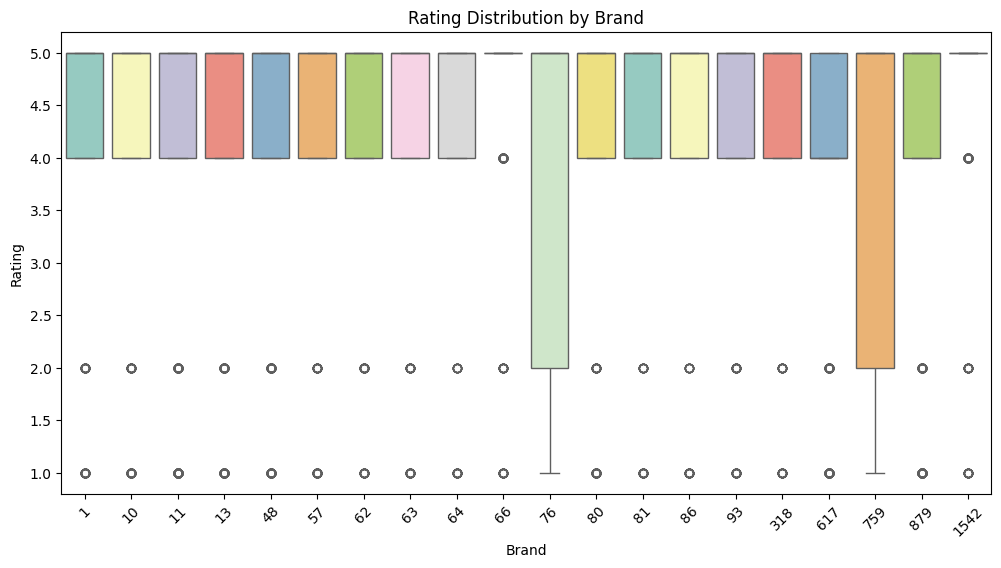

In [21]:
import seaborn as sns


# FIND THE TOP 20 BRANDS WITH MOST REVIEWS 

# Select top 20 brands with the most reviews
top_brands = df["brand"].value_counts().head(20).index

# Filter dataset to include only top brands (this is to make sure the graph is not too crowded)
df_top_brands = df[df["brand"].isin(top_brands)]  

# Box plot of rating distribution per brand
plt.figure(figsize=(12,6))
sns.boxplot(x="brand", y="rating", data=df_top_brands, palette="Set3")
plt.title("Rating Distribution by Brand")
plt.xlabel("Brand")
plt.ylabel("Rating")
plt.xticks(rotation=45)
plt.show()


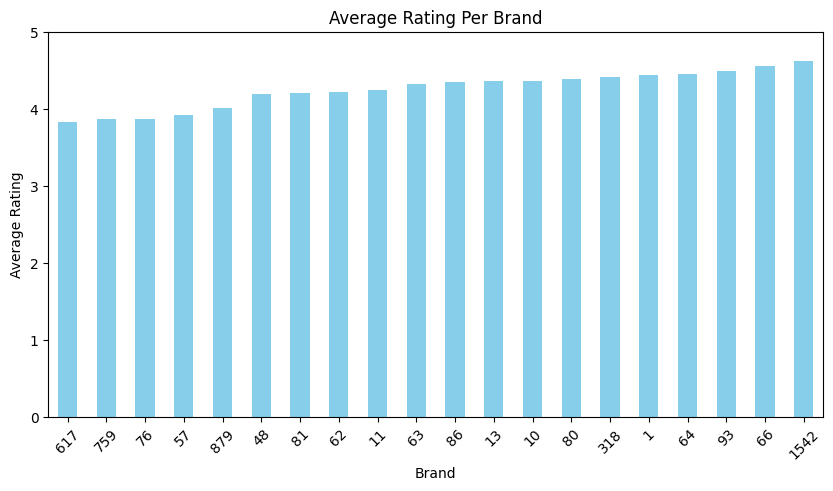

In [22]:

# CALCULATE THE AVERAGE RATING PER BRAND IN THE TOP 20 BRANDS

# Calculate the average rating per brand
brand_avg_ratings = df_top_brands.groupby("brand")["rating"].mean().sort_values()

# Plot a bar chart
plt.figure(figsize=(10, 5))
brand_avg_ratings.plot(kind="bar", color="skyblue")
plt.title("Average Rating Per Brand")
plt.xlabel("Brand")
plt.ylabel("Average Rating")
plt.xticks(rotation=45)
plt.ylim(0, 5)  # Keep rating scale between 0 and 5
plt.show()


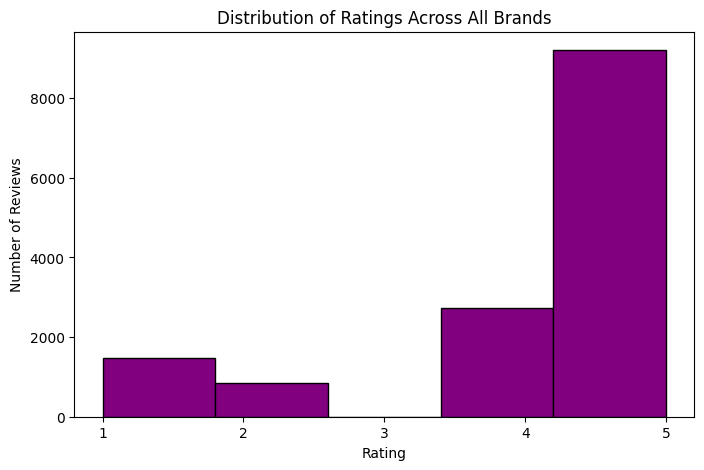

In [ ]:
# SHOW HOW THE RATINGS ARE SPREAD FOR ALL BRANDS


plt.figure(figsize=(8,5))
plt.hist(df["rating"], bins=5, color="purple", edgecolor="black")
plt.title("Distribution of Ratings Across All Brands")
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.xticks([1,2,3,4,5])
plt.show()
